# import Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Load Dataset

In [2]:
df=pd.read_csv('airline_safety.csv')

In [3]:
df.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


# Data Exploration and pre-processing

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   id                                 10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   Customer Type                      10000 non-null  object 
 4   Age                                10000 non-null  int64  
 5   Type of Travel                     10000 non-null  object 
 6   Class                              10000 non-null  object 
 7   Flight Distance                    10000 non-null  int64  
 8   Inflight wifi service              10000 non-null  int64  
 9   Departure/Arrival time convenient  10000 non-null  int64  
 10  Ease of Online booking             10000 non-null  int64  
 11  Gate location                      10000 non-null  int6

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


# Drop columns

In [7]:
df=df.drop(['Unnamed: 0','id'],axis=1)

In [8]:
df.columns=df.columns.str.replace(" ","_")

In [9]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

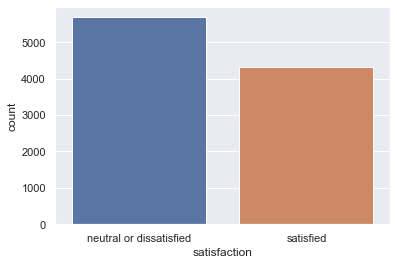

In [10]:
sns.countplot(df['satisfaction'])

# Drop null values

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Label Encoder for categorical variable

In [13]:
from sklearn.preprocessing import LabelEncoder
df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']]=df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']].apply(LabelEncoder().fit_transform)

0    5673
1    4301
Name: satisfaction, dtype: int64

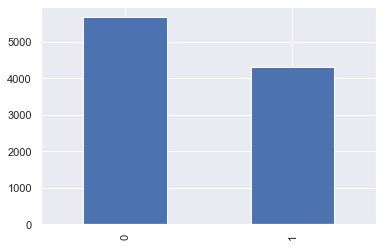

In [14]:
df['satisfaction'].value_counts().plot(kind='bar')
df['satisfaction'].value_counts()

<AxesSubplot:xlabel='satisfaction'>

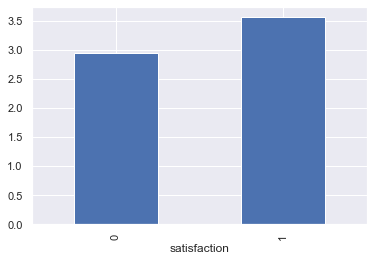

In [15]:
df.groupby('satisfaction')['Food_and_drink'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Flight_Distance'>

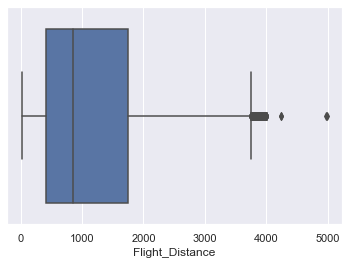

In [16]:
sns.boxplot(df['Flight_Distance'])

<AxesSubplot:xlabel='Checkin_service'>

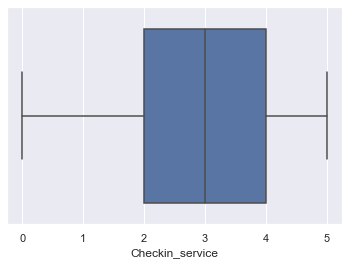

In [17]:
sns.boxplot(df['Checkin_service'])

In [18]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# create target and feature variables

In [19]:
x=df.drop('satisfaction',axis=1)
y=df.satisfaction

#  create training and testing data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6981, 22), (2993, 22), (6981,), (2993,))

# apply algorithm to dataset

In [22]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

# model_evaluation

In [23]:
model.score(x_test,y_test)

0.9281657200133645

In [24]:
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.9281657200133645

In [26]:
print(classification_report(y_test,y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.93659   0.93823   0.93741      1716
           1    0.91680   0.91464   0.91572      1277

    accuracy                        0.92817      2993
   macro avg    0.92669   0.92644   0.92656      2993
weighted avg    0.92815   0.92817   0.92815      2993



In [27]:
confusion_matrix(y_test,y_pred)

array([[1610,  106],
       [ 109, 1168]], dtype=int64)

In [28]:
from sklearn import metrics

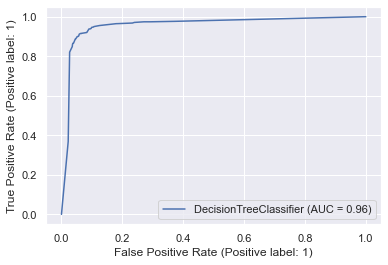

In [29]:
metrics.plot_roc_curve(model,x_test,y_test)